<a href="https://colab.research.google.com/github/Ghada6336/Iris/blob/main/iris_first_TRY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Iris Flower Classification using Python

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
from google.colab import files
upload=files.upload()


Saving Iris_2 (1).csv to Iris_2 (1).csv


In [8]:
iris = pd.read_csv('/content/Iris_2 (1).csv')

In [ ]:
print(iris.head())

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [ ]:
print(iris.describe())

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [9]:
print("Target Labels", iris["species"].unique())

Target Labels ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [10]:
import plotly.express as px
fig = px.scatter(iris, x="sepal_width", y="sepal_length", color="species")
fig.show()

# Iris Classification Model
 KNN classification

In [ ]:
x = iris.drop("species", axis=1)
y = iris["species"]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.2,
                                                    random_state=0)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

try the predition model

In [ ]:
x_new = np.array([[5, 2.9, 1, 0.2]])
prediction = knn.predict(x_new)
print("Prediction: {}".format(prediction))

Prediction: ['Iris-setosa']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names



# In depth Iris classfication

In [ ]:
# Import necessary libraries from sklearn
from sklearn.linear_model import LogisticRegression
# Corrected module for splitting the dataset
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier  # For K-Nearest Neighbors
from sklearn import svm  # For Support Vector Machine (SVM) Algorithm
from sklearn import metrics  # For checking the model accuracy
# For using Decision Tree Algorithm
from sklearn.tree import DecisionTreeClassifier

In [ ]:
iris.shape

(150, 5)

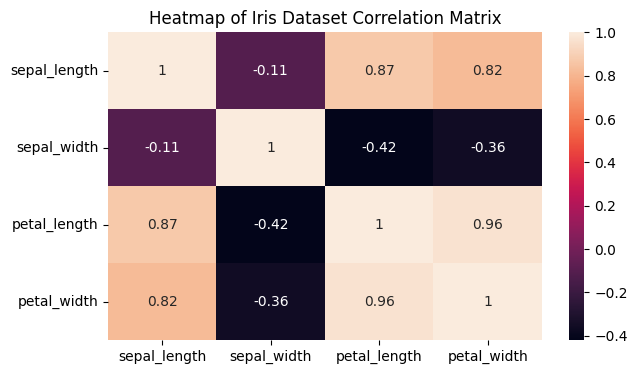

In [ ]:
# Calculate the correlation matrix, excluding the 'species' column
correlation_matrix = iris.drop(columns=['species']).corr()

# Plot the heatmap
plt.figure(figsize=(7, 4))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Heatmap of Iris Dataset Correlation Matrix')
plt.show()

Splitting The Data into Training And Testing Dataset

In [ ]:
# in this our main data is split into train and test
train, test = train_test_split(iris, test_size=0.3)
# the attribute test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=30%
print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
train_X = train[['sepal_length', 'sepal_width', 'petal_length',
                 'petal_width']]  # taking the training data features
train_y = train.species  # output of our training data
test_X = test[['sepal_length', 'sepal_width', 'petal_length',
               'petal_width']]  # taking test data features
test_y = test.species   #output value of test data

In [ ]:
train_X.head(2)

,sepal_length,sepal_width,petal_length,petal_width
72,6.3,2.5,4.9,1.5
12,4.8,3.0,1.4,0.1


In [ ]:
test_X.head(2)

,sepal_length,sepal_width,petal_length,petal_width
51,6.4,3.2,4.5,1.5
82,5.8,2.7,3.9,1.2


In [ ]:
train_y.head()

72     Iris-versicolor
12         Iris-setosa
83     Iris-versicolor
130     Iris-virginica
26         Iris-setosa
Name: species, dtype: object

Support Vector Machine (SVM)

In [ ]:
model = svm.SVC()  # select the algorithm
# we train the algorithm with the training data and the training output
model.fit(train_X, train_y)
# now we pass the testing data to the trained algorithm
prediction = model.predict(test_X)
# now we check the accuracy of the algorithm.
print('The accuracy of the SVM is:', metrics.accuracy_score(prediction, test_y))
# we pass the predicted output by the model and the actual output

The accuracy of the SVM is: 0.9555555555555556


Logistic Regression

In [ ]:
model = LogisticRegression()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('The accuracy of the Logistic Regression is', metrics.accuracy_score(prediction,test_y))

The accuracy of the Logistic Regression is 0.9777777777777777


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Decision Tree

In [ ]:
model = DecisionTreeClassifier()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('The accuracy of the Decision Tree is', metrics.accuracy_score(prediction,test_y))

The accuracy of the Decision Tree is 0.9777777777777777


K-Nearest Neighbours

In [ ]:
# this examines 3 neighbours for putting the new data into a class
model = KNeighborsClassifier(n_neighbors=3)
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('The accuracy of the KNN is', metrics.accuracy_score(prediction,test_y))

The accuracy of the KNN is 1.0


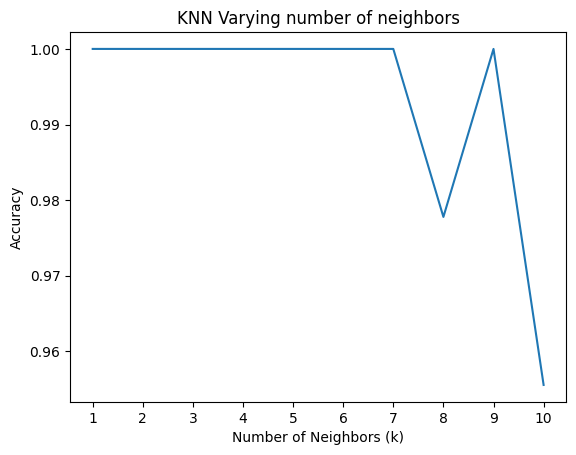

In [ ]:

a_index = list(range(1, 11))
a = pd.Series(dtype='float64')
x = list(range(1, 11))

for i in a_index:
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(train_X, train_y)
    prediction = model.predict(test_X)
    accuracy = metrics.accuracy_score(test_y, prediction)
    a = pd.concat([a, pd.Series([accuracy])], ignore_index=True)

plt.plot(a_index, a)
plt.xticks(x)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Varying number of neighbors')
plt.show()

In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Creating Petals And Sepals Training Data

In [ ]:
petal = iris[['petal_length', 'petal_width', 'species']]
sepal = iris[['sepal_length', 'sepal_width', 'species']]

In [ ]:
train_p, test_p = train_test_split(
    petal, test_size=0.3, random_state=0)  # petals
train_x_p = train_p[['petal_width', 'petal_length']]
train_y_p = train_p.species
test_x_p = test_p[['petal_width', 'petal_length']]
test_y_p = test_p.species


train_s, test_s = train_test_split(
    sepal, test_size=0.3, random_state=0)  # Sepal
train_x_s = train_s[['sepal_length', 'sepal_width']]
train_y_s = train_s.species
test_x_s = test_s[['sepal_length', 'sepal_width']]
test_y_s = test_s.species

SVM

In [ ]:
model = svm.SVC()
model.fit(train_x_p, train_y_p)
prediction = model.predict(test_x_p)
print('The accuracy of the SVM using Petals is:',
      metrics.accuracy_score(prediction, test_y_p))

model = svm.SVC()
model.fit(train_x_s, train_y_s)
prediction = model.predict(test_x_s)
print('The accuracy of the SVM using Sepal is:', metrics.accuracy_score(prediction,test_y_s))

The accuracy of the SVM using Petals is: 0.9777777777777777
The accuracy of the SVM using Sepal is: 0.8


Logistic Regression

In [ ]:
model = LogisticRegression()
model.fit(train_x_p, train_y_p)
prediction = model.predict(test_x_p)
print('The accuracy of the Logistic Regression using Petals is:',
      metrics.accuracy_score(prediction, test_y_p))

model.fit(train_x_s, train_y_s)
prediction = model.predict(test_x_s)
print('The accuracy of the Logistic Regression using Sepals is:', metrics.accuracy_score(prediction,test_y_s))

The accuracy of the Logistic Regression using Petals is: 0.9777777777777777
The accuracy of the Logistic Regression using Sepals is: 0.8222222222222222


Decision Tree

In [ ]:
model = DecisionTreeClassifier()
model.fit(train_x_p, train_y_p)
prediction = model.predict(test_x_p)
print('The accuracy of the Decision Tree using Petals is:',
      metrics.accuracy_score(prediction, test_y_p))

model.fit(train_x_s, train_y_s)
prediction = model.predict(test_x_s)
print('The accuracy of the Decision Tree using Sepals is:', metrics.accuracy_score(prediction,test_y_s))

The accuracy of the Decision Tree using Petals is: 0.9555555555555556
The accuracy of the Decision Tree using Sepals is: 0.6666666666666666


K-Nearest Neighbours

In [ ]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(train_x_p, train_y_p)
prediction = model.predict(test_x_p)
print('The accuracy of the KNN using Petals is:',
      metrics.accuracy_score(prediction, test_y_p))

model.fit(train_x_s, train_y_s)
prediction = model.predict(test_x_s)
print('The accuracy of the KNN using Sepals is:', metrics.accuracy_score(prediction,test_y_s))

The accuracy of the KNN using Petals is: 0.9777777777777777
The accuracy of the KNN using Sepals is: 0.7333333333333333
